In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['glucose'].sample(n=20, replace=False)

640    102
501     84
718    108
552    114
708    164
369    133
244    146
261    141
35     103
475    137
184    141
623     94
165    104
30     109
412    143
299    112
528    117
189    139
553     88
355    165
Name: glucose, dtype: int64

In [ ]:
df['glucose'].sample(frac=0.1, replace=True)

645    157
681    162
399    193
277    104
576    108
      ... 
572    111
179    130
524    125
259    155
303    115
Name: glucose, Length: 77, dtype: int64

In [ ]:
glucose = df['glucose']

means = []

for i in range(100_000):
    sample = glucose.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

<ipython-input-29-b134403010b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


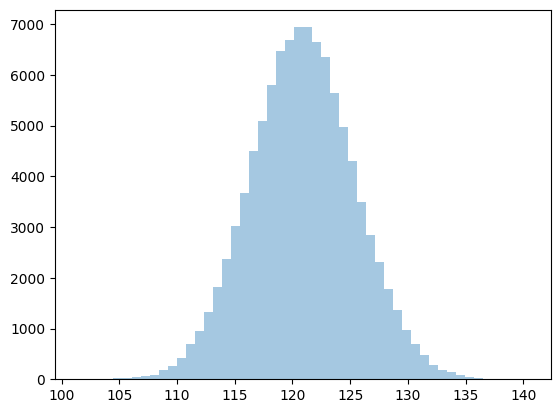

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [ ]:
serie_means.skew()

0.03794107043162999

In [ ]:
serie_means.kurtosis()

0.017210553667753814

Ejemplo 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
glucose = df['glucose']

means = []

for i in range(100_000):
    sample = glucose.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

In [ ]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 4.517635559526413


In [ ]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 100.14
Valor máximo: 140.7
Rango: 40.55999999999999


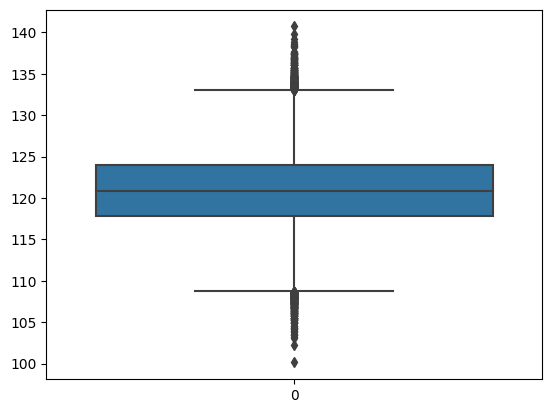

In [ ]:
sns.boxplot(serie_means);

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {glucose.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 112.16 < 120.89453125 < 129.88


In [ ]:
mean_of_intervals = ((glucose.mean() - limite_inferior) + (limite_superior - glucose.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {glucose.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 120.89453125 +/- 8.86


<ipython-input-16-5881df1d38d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False)


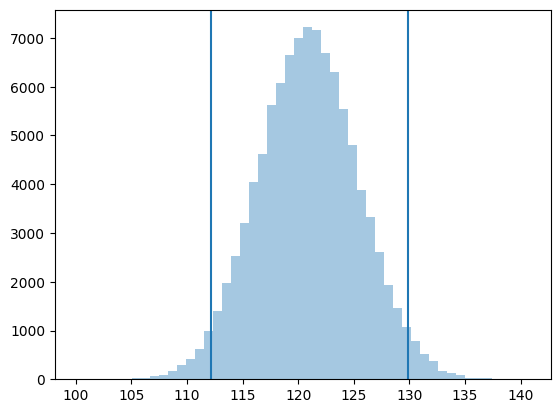

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

Ejemplo 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [ ]:
df = df.drop(columns=['outcome'])

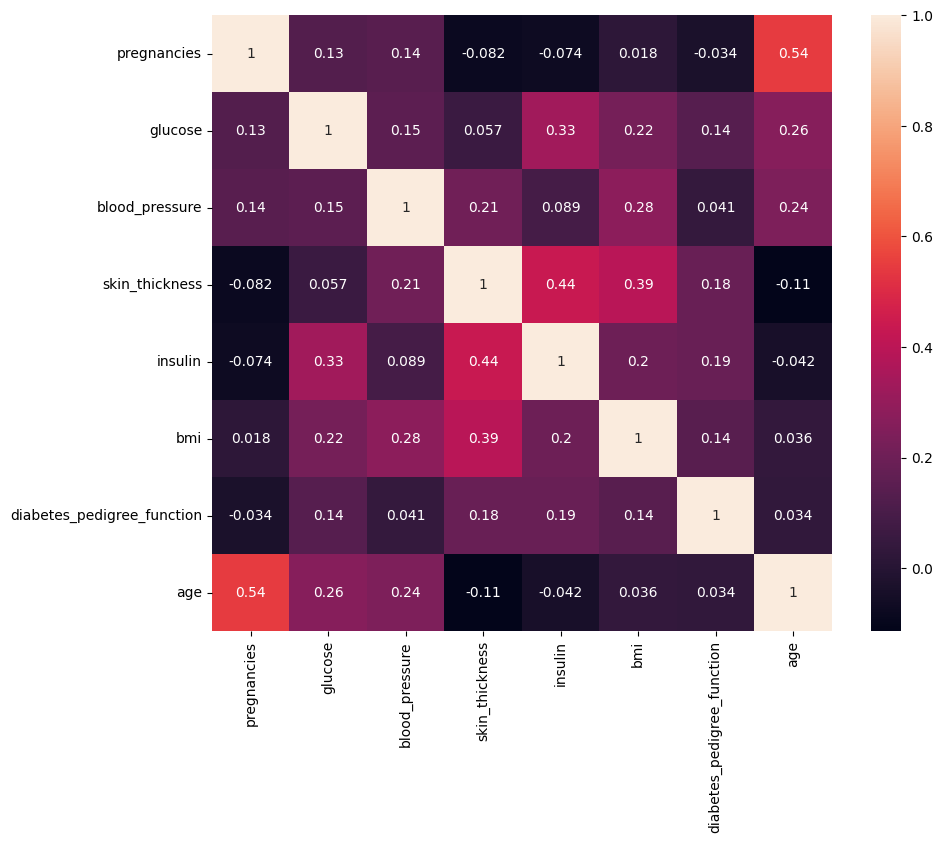

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['glucose', 'skin_thickness']]
y = df['insulin']
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.3479254418099623

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)

LinearRegression()

In [ ]:
lr_2.score(X, y)

0.28491868235030937

Reto 3

Para este Reto vamos a utilizar el dataset 'wine_quality_red-clean.csv'. Este dataset tiene muchas variables numéricas. Realiza los procesos que se enumeran a continuación. Explica paso a paso tu proceso para que puedas presentarlo a los demás.

Explora las correlaciones que existen entre estas variables.

Elige dos o más variables independientes y una variable dependiente.

Explora las variables que elegiste para asegurarte de que estén limpias y de que no haya valores atípicos que puedan arruinar el modelo.

Separa tus datos en dataset de entrenamiento y prueba usando scikit-learn.

Entrena un modelo de Regresión Lineal Múltiple con tu dataset de entrenamiento.
Evalúa tu modelo usando el dataset de prueba.

Si crees que una combinación de variables pueda obtener mejor resultado, repite y el proceso.

Presenta tus hallazgos a tus compañeros.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto wine_quality_red-clean.csv', index_col=0)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

<Axes: >

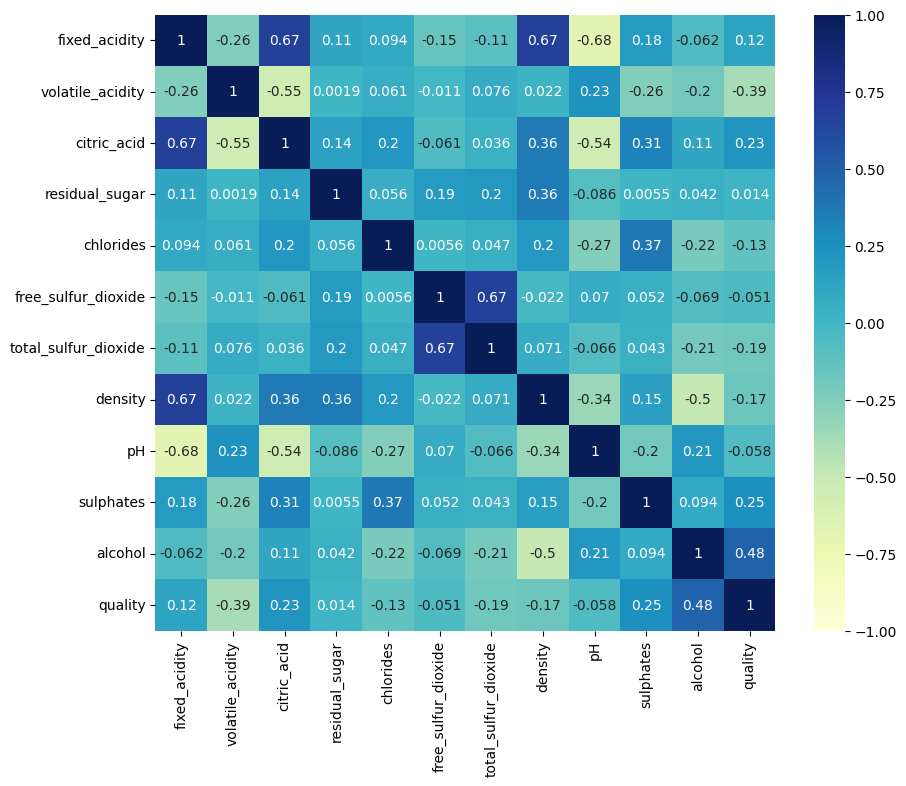

In [6]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

In [7]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
x=df[["volatile_acidity","alcohol"]]
y=df["quality"]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle = False)

In [11]:
x_train.head()

,volatile_acidity,alcohol
0,0.70,9.4
1,0.88,9.8
2,0.76,9.8
3,0.28,9.8
4,0.70,9.4


In [18]:
y_train.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
lr.score(x_test, y_test)

0.27756604384151995

In [22]:
x=df.drop(columns="quality")
y=df["quality"]

In [23]:
x_train, x_test, t_train, y_test = train_test_split(x,y,test_size=0.3,shuffle = False)

In [24]:
x_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
lr.score(x_test, y_test)

0.3011634915683209

Ejemplo 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df = df.drop(columns=['outcome'])

In [ ]:
X = df[['glucose', 'skin_thickness']]
y = df['insulin']

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
scores = cross_validate(lr, X, y, scoring='r2', cv=4)
scores

{'fit_time': array([0.02152038, 0.00860858, 0.02229595, 0.00429177]),
 'score_time': array([0.01601458, 0.01512504, 0.00784564, 0.00964522]),
 'test_score': array([0.33915214, 0.31083397, 0.24582468, 0.18782375])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.271 +/- 0.065
